# Content / Process

## 1. Library Imports

## 2. Reading the Data
- **2.1 Getting Data Info**  
- **2.2 Checking for Duplicates**  
  *Discussion: Why I didn’t drop the duplicates*  
- **2.3 Checking Unique Value Counts**

## 3. Visualization and Basket Creation
- **3.1 Top 20 Most Popular Items**  
  - *Insight*
- **3.2 Basket Size Distribution**  
  - *Insight*
- **3.3 Co-occurrence Matrix of Top 15 Items**  
  - *Insight*
- **3.4 Transaction Analysis**  
  - *Reason*  
  - **3.4.1 Calculating Transactions**  
  - **3.4.2 Plotting Transactions**  
  - *Insights from Section 3.4*
- **3.5 Basket Selection Based on Parameters (Average Basket Size, Std Dev, Coverage)**  
  - *Reason for Doing This*  
  - *Why I Selected the Member Basket*

## 4. Basket Preprocessing  
*Discussion*
- **4.1 Creating Train Basket**  
- **4.2 Creating Test Basket**

## 5. Methodology

### 5.1 TASK 1: Mining Frequent Patterns
- **5.1.1 Adjustment of Association Rule Parameters to Improve Generalization**
- **5.1.2 Implementation**
- **5.1.3 Printing the Rules**
- **5.1.4 Evaluating Patterns on Test Set**  
  - *Justification for Avoiding Overlapping Baskets in Train and Test Set*  
  - *What We Are Doing to Evaluate Rules on the Test Set*
- **5.1.5 Plots (Train vs Test): Support and Confidence**
- **5.1.6 Selecting TOP Rules based on both Training Set and Test Set Generalization**  
  - *Why We Sort by Confidence Followed by Confidence on Test Set*
- **5.1.7 Printing 5 Sample Rules**
- **5.1.8 Evaluation on Test vs. Train using Precision, RMSE, MAE**  
  - *Justification for Using Precision, RMSE,
     MAE*
### 5.2 TASK 2: Collaborative Filtering
- **5.2.1 Getting the Association Rules**
- **5.2.2 Collaborative Filtering using Jaccard Method (Recommendation without
patterns)**
- **5.2.3 CF+ Association Rules (Recommendation with patterns)**
- **5.2.4 Using 5 Sample Rules to give Recommendation, 2 for each rule**
- **5.2.5 Evaluation (CF (without patterns) vs CF+AR(with patterns))**

### 5.3 TASK3 : Research Integration (Just a Jist on boosting method)
- **5.3.1 Implementaion**

# 1.Library Imports

In [1]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.4 MB/s eta 0:00:00


In [2]:
pip install tabulate

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
import re
import ast
from mlxtend.frequent_patterns import apriori,fpgrowth, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import heapq
# from pyECLAT import ECLAT
# from fim import eclat
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


# 2. Reading the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/My Drive/Groceries data train.csv'

df = pd.read_csv(file_path)
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1


In [6]:
# df=pd.read_csv("Groceries data train.csv")
# df.head()

## 2.1 Getting data info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    27000 non-null  int64 
 1   Date             27000 non-null  object
 2   itemDescription  27000 non-null  object
 3   year             27000 non-null  int64 
 4   month            27000 non-null  int64 
 5   day              27000 non-null  int64 
 6   day_of_week      27000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.4+ MB


## 2.2 Checking the duplicates

In [8]:
duplicate_rows = df[df.duplicated(keep=False)]

print("Duplicated Rows:")
duplicate_rows


Duplicated Rows:


,Member_number,Date,itemDescription,year,month,day,day_of_week
28,4220,5/05/2014,rolls/buns,2014,5,5,0
65,1358,9/11/2015,whipped/sour cream,2015,11,9,0
106,1132,19/02/2015,other vegetables,2015,2,19,3
160,4462,4/02/2015,rolls/buns,2015,2,4,2
163,3380,16/08/2014,other vegetables,2014,8,16,5
...,...,...,...,...,...,...,...
26783,1135,7/10/2015,soda,2015,10,7,2
26862,2645,23/12/2014,hygiene articles,2014,12,23,1
26948,4864,27/03/2015,whole milk,2015,3,27,4
26969,1340,23/01/2015,whole milk,2015,1,23,4


### Discussion : Why we didnt dropped the duplicates.
I didn’t drop duplicate rows because each row represents a transaction. If the same set of items appears more than once, it means that combination was bought multiple times. This repetition is important for calculating support and confidence in market basket analysis. Dropping duplicates would lose that frequency information and make the results less accurate.

## 2.3 Cheking the unique value counts

In [9]:
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
df_unique

,Variable,DistinctCount
0,Member_number,3872
1,Date,728
2,itemDescription,167
3,year,2
4,month,12
5,day,31
6,day_of_week,7


### Analysis
The dataset that contains transactional data from customers over time. It includes 3,872 unique member numbers, representing individual customers, and 728 distinct dates, which suggests the data spans nearly two years. There are 167 unique product descriptions, indicating a diverse range of items. The dataset also includes time-based features like year, month, day, and day of the week, which allow me to analyze seasonal and weekly shopping trends.

# 3. Visualization and Basket Creation

In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Transaction'] = (df['Member_number'].astype(str)+ '_'+ df['Date'].dt.strftime('%Y-%m-%d'))

#dummy basket creation for visualization
tx_basket = (df.groupby(['Transaction', 'itemDescription']).size().unstack(fill_value=0))


## 3.1 Top 20 Most Popular Items


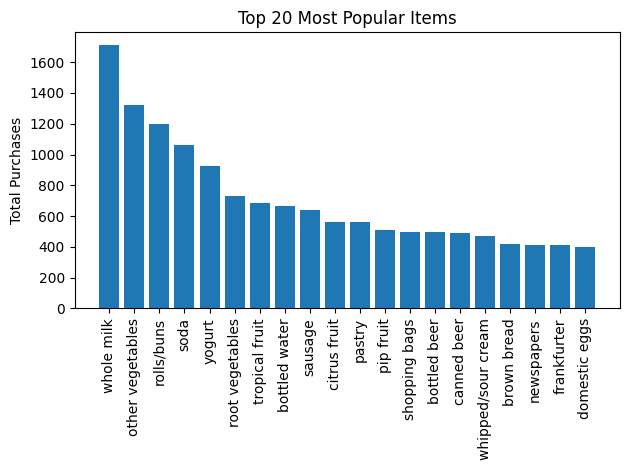

In [11]:
item_counts = tx_basket.sum().sort_values(ascending=False).head(20)
plt.figure()
plt.bar(range(len(item_counts)), item_counts.values)
plt.xticks(range(len(item_counts)), item_counts.index, rotation=90)
plt.ylabel('Total Purchases')
plt.title('Top 20 Most Popular Items')
plt.tight_layout()
plt.show()

### Insight
The visualization provide insights into customer shopping behavior and highlight the most frequently purchased items. The  figure is a bar chart that displays the top 20 products most commonly bought by customers. Taller bars—such as those representing whole milk and other vegetables indicate that these items are especially popular and are purchased by a large number of customers.

## 3.2 Basket Size Distribution



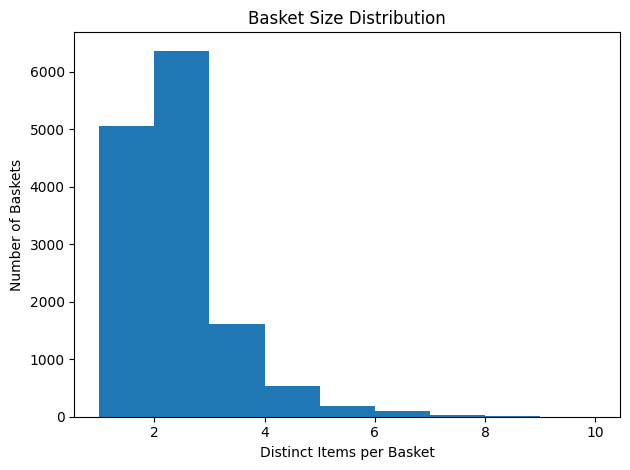

In [12]:
basket_sizes = (tx_basket > 0).sum(axis=1)
plt.figure()
plt.hist(basket_sizes, bins=range(1, basket_sizes.max()+2))
plt.xlabel('Distinct Items per Basket')
plt.ylabel('Number of Baskets')
plt.title('Basket Size Distribution')
plt.tight_layout()
plt.show()

### Insight
The  figure is a histogram that illustrates the distribution of basket sizes—that is, the number of different items purchased per transaction. The chart reveals that most customers typically buy only one to three different items during each visit. In contrast, only a small number of customers purchase more than five or six items in a single transaction.



## 3.3 Cooccurance Matrix of Top 15 Items


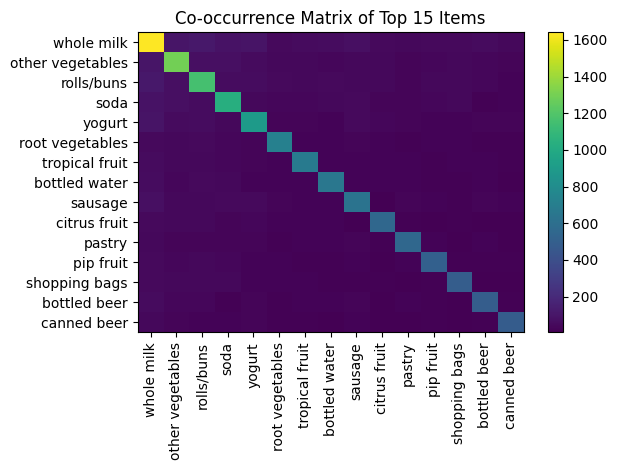

In [13]:
top15 = item_counts.index[:15]
bin_top = (tx_basket[top15] > 0).astype(int)
co_occur = bin_top.T.dot(bin_top)

plt.figure()
plt.imshow(co_occur.values, aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(top15)), top15, rotation=90)
plt.yticks(np.arange(len(top15)), top15)
plt.title('Co-occurrence Matrix of Top 15 Items')
plt.tight_layout()
plt.show()


### Insight
The figure is a heatmap representing the co-occurrence matrix of the top 15 best-selling items. It uses a color coded grid to visualize which products are frequently purchased together. Each row and column corresponds to one of the top 15 items, and the intensity of the color at each intersection indicates how often the corresponding pair of items appears in the same transaction. Brighter squares represent item pairs that commonly occur together, while darker squares indicate combinations that are rarely purchased at the same time.

## 3.4 Transaction Analysis

In [14]:
# datetime setup
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')
df['Week'] = df['Date'].dt.to_period('W')


### Reason
We are analyzing the average transactions per member over different time periods yearly, monthly, and weekly to identify any patterns or trends. This helps me understand when members tend to make purchases more frequently, so I can tailor market basket analyses accordingly, by creating basket based on weekly, monthly, or yearly transaction behaviors.

### 3.4.1 Calculating Transactions

In [15]:
#Calculating Average Transactions per year/month/week

# Average transactions per member per year
yearly = df.groupby(['Year', 'Member_number']).size().groupby('Year').mean()
print("\nAverage transactions per member per year:")
print(yearly)

# Average transactions per member per month
monthly = df.groupby(['Month', 'Member_number']).size().groupby('Month').mean()
print("\nAverage transactions per member per month:")
print(monthly)

# Average transactions per member per week
weekly = df.groupby(['Week', 'Member_number']).size().groupby('Week').mean()
print("\nAverage transactions per member per week:")
print(weekly)



Average transactions per member per year:
Year
2014    3.789035
2015    4.419554
dtype: float64

Average transactions per member per month:
Month
2014-01    1.871658
2014-02    1.862917
2014-03    1.815199
2014-04    1.867257
2014-05    1.886326
2014-06    1.926523
2014-07    1.885135
2014-08    1.824138
2014-09    1.816764
2014-10    1.781879
2014-11    1.838938
2014-12    1.916071
2015-01    2.281250
2015-02    2.220524
2015-03    2.362949
2015-04    2.374000
2015-05    2.351248
2015-06    2.395793
2015-07    2.292089
2015-08    2.365217
2015-09    2.339662
2015-10    2.334008
2015-11    2.339015
2015-12    2.356394
Freq: M, dtype: float64

Average transactions per member per week:
Week
2013-12-30/2014-01-05    1.696429
2014-01-06/2014-01-12    1.829268
2014-01-13/2014-01-19    1.628788
2014-01-20/2014-01-26    1.694030
2014-01-27/2014-02-02    1.769231
                           ...   
2015-11-30/2015-12-06    2.426087
2015-12-07/2015-12-13    2.360360
2015-12-14/2015-12-20    2.09

### 3.4.2 Plotting Transactions

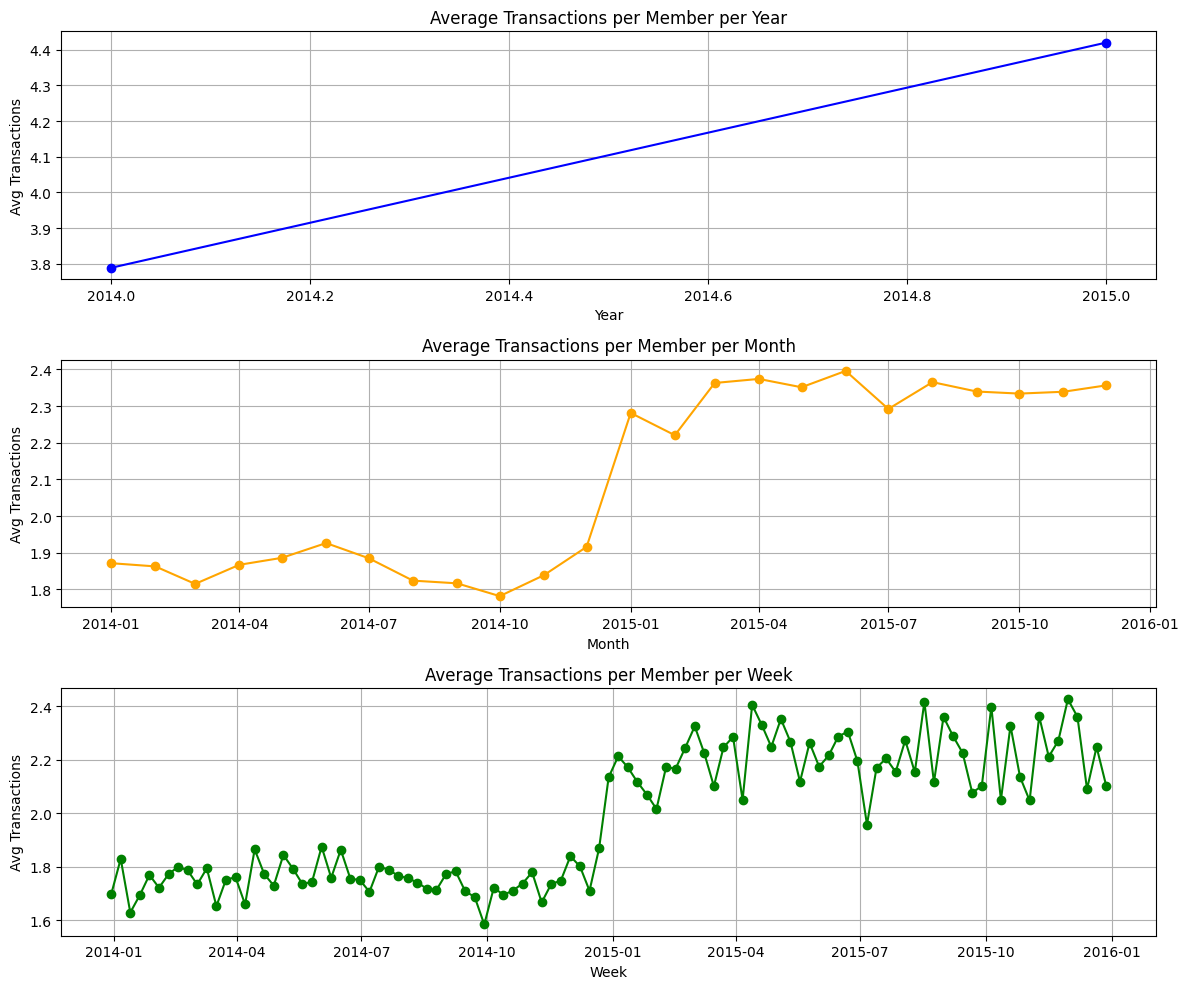

In [16]:
plt.figure(figsize=(12, 10))

# Yearly plot
plt.subplot(3, 1, 1)
plt.plot(yearly.index, yearly.values, marker='o', color='blue')
plt.title('Average Transactions per Member per Year')
plt.xlabel('Year')
plt.ylabel('Avg Transactions')
plt.grid(True)

# Monthly plot
plt.subplot(3, 1, 2)
if isinstance(monthly.index, pd.PeriodIndex):
    x_vals = monthly.index.to_timestamp()
else:
    x_vals = monthly.index
plt.plot(x_vals, monthly.values, marker='o', color='orange')
plt.title('Average Transactions per Member per Month')
plt.xlabel('Month')
plt.ylabel('Avg Transactions')
plt.grid(True)

# Weekly plot
plt.subplot(3, 1, 3)
if isinstance(weekly.index, pd.PeriodIndex):
    x_vals = weekly.index.to_timestamp()
else:
    x_vals = weekly.index
plt.plot(x_vals, weekly.values, marker='o', color='green')
plt.title('Average Transactions per Member per Week')
plt.xlabel('Week')
plt.ylabel('Avg Transactions')
plt.grid(True)

plt.tight_layout()
plt.show()


### Insights of Section 3.4
From Section 3.4.1 and 3.4.2: The average transactions per member show a slight increase from 2014 to 2015, with yearly averages of about 3.79 and 4.42 respectively. Monthly averages fluctuate between roughly 1.78 and 2.38, while weekly averages range from about 1.6 to 2.4 transactions.

Overall, there doesn’t seem to be any clear or prominent pattern in the transaction frequencies across years, months, or weeks.

This suggests member transaction behavior is relatively stable without strong seasonal or periodic trends.

## 3.5 Basket Selection based on parameters like avg basket size, std dev, coverage.

### Reason for this analysis
Since there doesn’t seem to be any clear or prominent pattern in transaction frequencies across years, months, or weeks, this suggests that member transaction behavior is relatively stable without strong seasonal or periodic trends. Therefore, I will create yearly, monthly, and weekly baskets per member:

I chose average basket size, standard deviation, coverage, and frequent item support because they effectively show customer buying behavior.

As mentioned in the Klipfolio article “Ecommerce KPIs: Average Basket Size” [1], average basket size helps understand typical purchase quantity. Standard deviation shows how much basket sizes vary, which is important for analyzing consistency [2]. Coverage ensures all items are considered, and frequent items highlight popular products. Together, these metrics help me compare baskets across time frames and find the best aggregation for analysis.

In [17]:
def evaluate_basket_logical(df, group_col, label):
    df['Transaction'] = df['Member_number'].astype(str) + '_' + df[group_col].astype(str)

    basket = df.groupby(['Transaction', 'itemDescription']).size().unstack(fill_value=0)
    basket = (basket > 0).astype(int)

    basket_sizes = basket.sum(axis=1)
    avg_basket_size = basket_sizes.mean()
    std_basket_size = basket_sizes.std()

    total_items = basket.shape[1]
    items_present = (basket.sum() > 0).sum()
    item_coverage = 100 * items_present / total_items
    repeat_items = (basket.sum() >= 0.10 * basket.shape[0]).sum()

    print(f"{label:<15} | Baskets: {basket.shape[0]:5d} | Avg Size: {avg_basket_size:.2f} | Std Dev: {std_basket_size:.2f} | Coverage: {item_coverage:.1f}% | Frequent Items (>10%): {repeat_items}")

    return basket

In [18]:
# Evaluating different grouping strategies
evaluate_basket_logical(df.copy(), 'Date', 'Daily Basket')
evaluate_basket_logical(df.copy(), 'Week', 'Weekly Basket')
evaluate_basket_logical(df.copy(), 'Month', 'Monthly Basket')
evaluate_basket_logical(df.copy(), 'Year', 'Yearly Basket')

# Member basket (without time)
member_basket = df.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
member_basket = (member_basket > 0).astype(int)

basket_sizes = member_basket.sum(axis=1)
avg_size = basket_sizes.mean()
std_size = basket_sizes.std()

total_items = member_basket.shape[1]
items_present = (member_basket.sum() > 0).sum()
coverage = 100 * items_present / total_items
repeat_items = (member_basket.sum() >= 0.10 * member_basket.shape[0]).sum()

print(f"{'Member Basket':<15} | Baskets: {member_basket.shape[0]:5d} | Avg Size: {avg_size:.2f} | Std Dev: {std_size:.2f} | Coverage: {coverage:.1f}% | Frequent Items (>10%): {repeat_items}")


Daily Basket    | Baskets: 13901 | Avg Size: 1.91 | Std Dev: 0.97 | Coverage: 100.0% | Frequent Items (>10%): 1
Weekly Basket   | Baskets: 13707 | Avg Size: 1.94 | Std Dev: 1.01 | Coverage: 100.0% | Frequent Items (>10%): 1
Monthly Basket  | Baskets: 12961 | Avg Size: 2.05 | Std Dev: 1.12 | Coverage: 100.0% | Frequent Items (>10%): 1
Yearly Basket   | Baskets:  6588 | Avg Size: 3.91 | Std Dev: 2.45 | Coverage: 100.0% | Frequent Items (>10%): 6
Member Basket   | Baskets:  3872 | Avg Size: 6.46 | Std Dev: 3.48 | Coverage: 100.0% | Frequent Items (>10%): 18


### Why we Select the Member Basket

Among all, the Member Basket has the highest average basket size (6.46), meaning each member’s aggregated transactions show the greatest diversity of items purchased. It also has the highest standard deviation (3.48), which means it captures a wide range of buying behaviors. Furthermore, the Member Basket contains the most frequent items (18 items appearing in more than 10% of baskets), showing stronger, more stable product popularity trends.

In contrast, daily, weekly, and monthly baskets have smaller average sizes (~2 items) and only 1 frequent item each, indicating they capture only a limited snapshot of buying behavior and may miss broader patterns.

Therefore, I conclude the Member Basket is the most meaningful aggregation level for analyzing customer purchase behavior, as it balances capturing comprehensive buying patterns and highlighting popular items.

# 4. Basket Preprocessing

## Discussion
We grouped the data by each Member_number and itemDescription to create a matrix showing what each member has purchased. Then, we converted the counts into 1s and 0s where 1 means the member bought the item at least once, and 0 means they didn’t. This binary (one-hot) encoding helps me simplify the data and easily compare shopping patterns across members, especially for tasks like finding frequently bought items or analyzing customer behavior.

## 4.1 Creating Train Basket

In [137]:
basket = df.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [138]:
basket = (basket > 0).astype(int)
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [139]:
basket.shape

(3872, 167)

## 4.2 Creating Test Basket

In [140]:
# df1 = pd.read_csv('Groceries data test.csv')
# df1.head()
df1 = pd.read_csv('/content/drive/My Drive/Groceries data test.csv')
df1.head()


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3481,8/03/2015,candy,2015,3,8,6
1,1254,19/04/2015,white wine,2015,4,19,6
2,2835,28/01/2014,domestic eggs,2014,1,28,1
3,2854,2/08/2015,coffee,2015,8,2,6
4,4637,12/08/2014,bottled water,2014,8,12,1


In [141]:
test_basket = df1.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
test_basket = test_basket.applymap(lambda x: 1 if x > 0 else 0)
test_basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Methodology

In [24]:
import warnings
warnings.filterwarnings('ignore')

# Thresholds
support_thresholds = [0.001, 0.005] + list(i / 100 for i in range(1, 6))  # 0.1%, 0.5%, 1%-5%
confidence_thresholds = [i / 100 for i in range(30, 100, 10)] + [0.91]   # 30% to >90%

# Store results
results = []

for support in support_thresholds:
    frequent_itemsets = apriori(basket, min_support=support, use_colnames=True)
    if frequent_itemsets.empty:
        continue
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
    for confidence in confidence_thresholds:
        count = (rules['confidence'] >= confidence).sum()
        results.append({
            'min_support': round(support * 100, 2),
            'min_confidence': round(confidence * 100, 2),
            'rule_count': count })

# Create DataFrame and Pivot
summary_df = pd.DataFrame(results)
pivot_table = summary_df.pivot(index='min_support', columns='min_confidence', values='rule_count').fillna(0).astype(int)

pivot_table.index = pivot_table.index.map(lambda x: f"{x:.2f}%")
pivot_table.columns = pivot_table.columns.map(lambda x: f"{x:.0f}%")


print("\nRule Count Table (Support % vs Confidence %):\n")
print(pivot_table.to_string())

# --- Save to CSV ---
pivot_table.to_csv("rule_count_summary.csv")
print("\n Saved to 'rule_count_summary.csv' with % formatting.")



Rule Count Table (Support % vs Confidence %):

min_confidence    30%    40%    50%    60%   70%   80%   90%   91%
min_support                                                       
0.10%           57572  38274  25347  13588  7569  5805  2063  2052
0.50%            1564    759    232     40     2     0     0     0
1.00%             464    180     37      3     0     0     0     0
2.00%             121     39      3      0     0     0     0     0
3.00%              68     19      0      0     0     0     0     0
4.00%              35     12      0      0     0     0     0     0
5.00%              23      7      0      0     0     0     0     0

 Saved to 'rule_count_summary.csv' with % formatting.


In [89]:
total_transactions = basket.shape[0]
print('total number of items',total_transactions)

item_frequencies = (basket > 0).sum()
item_frequencies_pct = item_frequencies / total_transactions * 100

# Thresholds you care about
thresholds = [0.1, 0.2, 0.5, 1, 2, 5]

# Count how many items meet each threshold
support_summary = {
    'Support Threshold (%)': [],
    'Min Occurrence Count': [],
    'Number of Items': []}

for t in thresholds:
    count = (item_frequencies_pct >= t).sum()
    min_occ = int((t / 100) * total_transactions)
    support_summary['Support Threshold (%)'].append(t)
    support_summary['Min Occurrence Count'].append(min_occ)
    support_summary['Number of Items'].append(count)

# Create a DataFrame
support_df = pd.DataFrame(support_summary)

# Print nicely
print(support_df)

# Save to CSV if needed
support_df.to_csv("item_support_distribution.csv", index=False)
print("Saved as item_support_distribution.csv")


total number of items 3872
   Support Threshold (%)  Min Occurrence Count  Number of Items
0                    0.1                     3              161
1                    0.2                     7              153
2                    0.5                    19              128
3                    1.0                    38              102
4                    2.0                    77               75
5                    5.0                   193               38
Saved as item_support_distribution.csv


## 5.1 TASK-1 : Minning Frequent Patterns

### 5.1.1 Adjustment of Association Rule Parameters to Improve Generalization

Initially (in part A), rules were filtered based on the following criteria:
- **Support** = 0.1%
- **Lift:** > 10

This strict filtering resulted in:
- High-quality rules on training data
- Poor generalization on test data, limiting practical use


To improve generalization without compromising confidence thresholds:
- **Modified confidence thresholds for strong and moderate insights unchanged** to geralize rule reliability.
  - moderate_rules ( 80% > confidence >= 60%)
  - strong_rules ( confidence >= 80%)
- **Increased minimum support to 0.2%**:
  - Focused on more frequent, stable itemsets
  - Reduced noise from rare patterns
- **Lowered lift threshold from >10 to >2**:
  - Included moderately strong but more consistent associations
  - Improved rule coverage on test data

**Outcome:**
- Better test set coverage with relevant rules
- Maintained original confidence-based insight categories
- Balanced approach ensuring trustworthy and practically valuable insights across datasets


### 5.1.2 Implementation

In [98]:
def classify_insight_dynamic(row, lift_threshold):
    conf = row['confidence']
    lift = row['lift']

    if conf >= 0.80 and lift >= lift_threshold:
        return 'Strong Insight'
    elif 0.60 <= conf <= 0.80 and lift >= lift_threshold:
        return 'Moderate Insight'
    elif 0.20 <= conf < 0.60 and lift >= lift_threshold:
        return 'Weak Insight'
    else:
        return 'Ignore'

In [99]:
# def classify_insight_dynamic(row, lift_threshold):
#     conf = row['confidence']
#     lift = row['lift']

#     if conf >= 0.85 and lift >= lift_threshold:
#         return 'Strong Insight'
#     elif 0.70 <= conf < 0.85 and lift >= lift_threshold:
#         return 'Moderate Insight'
#     elif 0.60 <= conf < 0.70 and lift >= lift_threshold:
#         return 'Weak Insight'
#     else:
#         return 'Ignore'

(10498, 2)
Insight Quality Rule Counts:
Insight Quality
Strong Insight       141
Moderate Insight     549
Weak Insight        1862
Name: count, dtype: int64


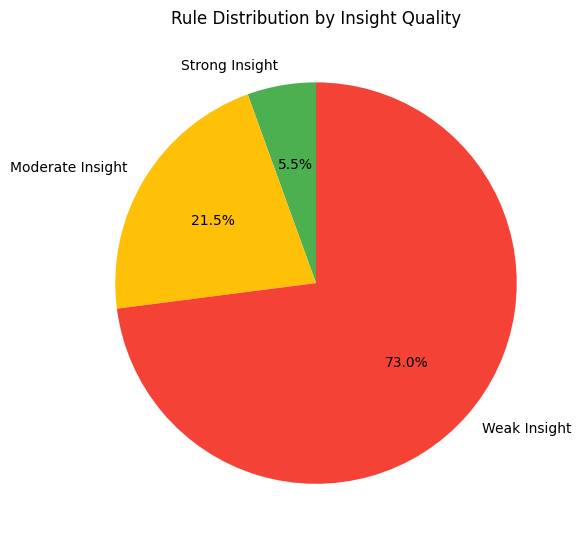


Final rules after removing 'Weak Insight': 690
Execution Time: 11.91 seconds


In [101]:
start_time = time.time()

frequent_itemsets = apriori(basket, min_support=0.002, use_colnames=True)
print(frequent_itemsets.shape)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules = rules[rules['lift'] > 2].reset_index(drop=True)

rules['Insight Quality'] = rules.apply(lambda row: classify_insight_dynamic(row, 2), axis=1)


# getting only moderate and strong rules in final_rules df

insight_counts = rules['Insight Quality'].value_counts().reindex(['Strong Insight', 'Moderate Insight', 'Weak Insight'], fill_value=0)
print("Insight Quality Rule Counts:")
print(insight_counts)

# Creating Pie chart for rule distribution
plt.figure(figsize=(6, 6))
colors = ['#4CAF50', '#FFC107', '#F44336']
insight_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, labels=insight_counts.index)
plt.title('Rule Distribution by Insight Quality')
plt.ylabel('')
plt.tight_layout()
plt.show()

final_rules = rules[rules['Insight Quality'].isin(['Strong Insight', 'Moderate Insight'])].reset_index(drop=True)
print(f"\nFinal rules after removing 'Weak Insight': {len(final_rules)}")


end_time = time.time()
print(f"Execution Time: {end_time - start_time:.2f} seconds")

### 5.1.3 Printing the Rules

In [102]:

consequent_lengths = sorted(final_rules['consequents'].apply(len).unique())

for length in consequent_lengths:
    subset = final_rules[final_rules['consequents'].apply(len) == length]
    count = len(subset)
    print(f"Rules with consequent length = {length} (total {count})")

    for i, row in subset.head(5).iterrows():
        ant = ', '.join(row['antecedents'])
        con = ', '.join(row['consequents'])
        insight = row['Insight Quality']
        sup = f"{row['support']:.4f}"
        conf = f"{row['confidence']:.2f}"
        lift = f"{row['lift']:.2f}"

        print(f"Rule #{i+1}: IF [{ant}] THEN [{con}]")

    print("-" * 40)

Rules with consequent length = 1 (total 688)
Rule #1: IF [prosecco] THEN [rolls/buns]
Rule #2: IF [UHT-milk, beverages] THEN [whole milk]
Rule #3: IF [chocolate, UHT-milk] THEN [sausage]
Rule #4: IF [UHT-milk, fruit/vegetable juice] THEN [other vegetables]
Rule #5: IF [UHT-milk, ice cream] THEN [whole milk]
----------------------------------------
Rules with consequent length = 2 (total 2)
Rule #329: IF [pork, candy] THEN [whole milk, yogurt]
Rule #663: IF [pastry, whipped/sour cream, yogurt] THEN [other vegetables, whole milk]
----------------------------------------


In [103]:
final_rules[['antecedents', 'consequents', 'support', 'confidence']].head()

,antecedents,consequents,support,confidence
0,(prosecco),(rolls/buns),0.002324,0.642857
1,"(UHT-milk, beverages)",(whole milk),0.002841,0.785714
2,"(chocolate, UHT-milk)",(sausage),0.002324,0.692308
3,"(UHT-milk, fruit/vegetable juice)",(other vegetables),0.003616,0.636364
4,"(UHT-milk, ice cream)",(whole milk),0.002324,0.750000


### 5.1.4 Evaluating Patterns on Test Set

### Justification for Avoiding Overlapping Baskets in Train and Test Sets

We aim to evaluate the quality and generalizability of the association rules we generate. To do this reliably, we ensure that the training and testing datasets do not contain overlapping baskets — that is, no identical set of items (basket) should appear in both train and test sets. If such overlaps were present, it would lead to data leakage, where the model is evaluated on data it has already seen during training. This would result in artificially high support and confidence values during testing, giving us an over-optimistic view of rule performance.

To prevent this, we first convert each row in the dataset into a `frozenset` representing the unique combination of items in the basket. Then, we drop duplicate baskets and perform a train-test split based on these unique baskets. This guarantees that all test baskets represent previously unseen combinations of items, ensuring a fair and realistic evaluation.


### What We Are Doing to Evaluate Rules on the Test Set (evaluating created rules/patterns for testset)

Once the train and test sets are prepared without overlap, we evaluate each generated rule by calculating its support and confidence on the test baskets:

- **Support** is the proportion of test baskets that contain both the antecedent and the consequent of the rule.
- **Confidence** is the proportion of baskets that contain the antecedent and also contain the consequent.

By doing this, we can assess how well the rules learned from the training data apply to unseen test data. This methodology provides a realistic indication of the rules' performance in practical applications, where the goal is to generalize from past data to new, unseen situations.


In [110]:
full_basket_df = pd.concat([basket, test_basket], ignore_index=True)
full_basket_df['basket_set'] = full_basket_df.apply(lambda row: frozenset(row.index[row == 1]), axis=1)

# Getting unique baskets (no overlap)
unique_baskets = full_basket_df[['basket_set']].drop_duplicates().reset_index(drop=True)
train_baskets_unique, test_baskets_unique = train_test_split(unique_baskets,test_size=0.3,random_state=42,shuffle=True)

train_df = full_basket_df[full_basket_df['basket_set'].isin(train_baskets_unique['basket_set'])]
test_df = full_basket_df[full_basket_df['basket_set'].isin(test_baskets_unique['basket_set'])]

train_baskets_sets = []
for idx, row in train_df.iterrows():
    items = set(row.index[row == 1])
    train_baskets_sets.append(items)

test_baskets_sets = []
for idx, row in test_df.iterrows():
    items = set(row.index[row == 1])
    test_baskets_sets.append(items)

overlap = set(map(frozenset, train_baskets_sets)).intersection(set(map(frozenset, test_baskets_sets)))

# Getting support/confidence function
def compute_support_confidence(rule_antecedent, rule_consequent, baskets):
    total_transactions = len(baskets)

    count_antecedent = 0
    count_both = 0

    for basket in baskets:
        if rule_antecedent.issubset(basket):
            count_antecedent += 1
            if rule_consequent.issubset(basket):
                count_both += 1

    support = count_both / total_transactions
    confidence = count_both / count_antecedent if count_antecedent > 0 else 0

    return support, confidence

# Computing support and confidence on test baskets for each rule
for idx, row in final_rules.iterrows():
    antecedent = row['antecedents']
    consequent = row['consequents']
    support_test, confidence_test = compute_support_confidence(antecedent, consequent, test_baskets_sets)

    final_rules.at[idx, 'support_test'] = support_test
    final_rules.at[idx, 'confidence_test'] = confidence_test

final_rules[['antecedents', 'consequents', 'support', 'confidence', 'support_test', 'confidence_test']][30:35]


,antecedents,consequents,support,confidence,support_test,confidence_test
30,"(butter, dishes)",(whole milk),0.002066,1.000000,0.000925,1.000000
31,"(butter, hygiene articles)",(rolls/buns),0.002324,0.600000,0.000463,0.166667
32,"(butter, oil)",(other vegetables),0.002583,0.625000,0.000925,0.333333
33,"(butter, onions)",(other vegetables),0.003099,0.600000,0.002313,0.833333
34,"(butter, sliced cheese)",(yogurt),0.002066,0.615385,0.000925,0.285714


### 5.1.5 Selecting TOP Rules based on both Training Set and Test Set Generalization


In [113]:
# Add column for antecedent length
final_rules['antecedent_len'] = final_rules['antecedents'].apply(lambda x: len(x))

final_rules = final_rules[(final_rules['antecedent_len'] <= 2)]
print(final_rules.shape)

# Sort by confidence and confidence_test
sorted_rules = final_rules.sort_values(by=['confidence', 'confidence_test'], ascending=False).reset_index(drop=True)

# Select top 5% of training transactions
num_transactions = len(train_baskets_sets)
top_n = int(0.5 * num_transactions)

# Take top N rules and shuffle them
top_rules = sorted_rules.head(top_n)
top_rules = top_rules.sample(frac=1, random_state=55).reset_index(drop=True)

#Save and show
top_rules[['antecedents', 'consequents', 'support', 'confidence','support_test', 'confidence_test']].to_csv('top_rules.csv', index=False)

print(top_rules.shape)
top_rules[['antecedents', 'consequents', 'support', 'confidence','support_test', 'confidence_test']].head()


(111, 18)
(111, 18)


,antecedents,consequents,support,confidence,support_test,confidence_test
0,"(pork, candy)","(whole milk, yogurt)",0.002066,0.615385,0.001388,0.750000
1,"(oil, frozen vegetables)",(soda),0.002066,0.727273,0.001850,0.800000
2,"(butter milk, curd)",(whole milk),0.002324,0.750000,0.001850,0.666667
3,"(pork, cat food)",(other vegetables),0.002841,0.611111,0.001388,0.750000
4,"(mustard, frozen vegetables)",(whole milk),0.002066,0.727273,0.001850,0.666667


### Why We Sort by Confidence Followed by Confidence on Test Set (`confidence_test`) Before Selecting Best Rules

After generating association rules from our transaction data, we aimed to select the most valuable and generalizable rules. We took the following approach:

 **Getting Rules with 'antecedents' less than and eqaul to 2 as to avoid overfitting and generalize on test data**:  
   If there is any rule with 100% then it might be super super strict and will lead to overfiiting in any other type of basket or dataset.

 **Sorting by `confidence` (descending)**:  
   Confidence indicates how often the consequent is true when the antecedent is true. Sorting by confidence helps us prioritize rules that are strongly predictive within the training data. It helps us capture rules that have a high internal consistency.

 **Then sorting by `confidence_test` (descending)**:  
   Our primary evaluation criterion is how well these rules **generalize to unseen data** (i.e., the test set). A rule might perform well on training data but fail to do so on new data due to overfitting or noise. Thus, we sort by `confidence_test` to prefer rules that maintain their predictive power on the test baskets.

**Selecting Top Rules (5% of #Training Transactions)**:  
   To make our evaluation tractable and meaningful, we select a number of rules proportional to our dataset size. Specifically, we take the top **5% of the number of training baskets**, as a balance between quality and coverage.

**Shuffling the Top Rules**:  
   After selecting the top rules based on sorted confidence metrics, we shuffle them to remove any positional bias in later stages like manual inspection or evaluation ordering.

This procedure ensures we focus on rules that are not only internally strong (confidence) but also generalize well (confidence_test) to unseen data, while keeping the evaluation practical.


### 5.1.6 Evaluation on Test wrt to Train Using Precision, RMSE, MAE

##  Justification for Using Precision, RMSE, MAE

In this project, we mined association rules from user transaction data (train baskets) and validated their effectiveness on unseen data (test baskets). To evaluate the quality and generalization of these rules, we specifically chose the following metrics:

- **Precision**: Measures how often rules that fire are actually correct. Important for avoiding misleading or noisy rules.

- **RMSE**: Captures how much rule confidence shifts from train to test, penalizing large errors more heavily.

- **MAE**: Shows the average deviation in confidence between train and test, helping us judge real-world rule stability.

---
> By combining classification-based (Precision) and regression-based (RMSE & MAE) metrics, we can evaluate both the **accuracy** and the **stability** of the mined rules, which is crucial for robust performance in real-world applications.


In [114]:
y_true, y_pred = [], []

for rule in top_rules.itertuples():
    ant = rule.antecedents
    cons = rule.consequents

    for basket in test_baskets_sets:
        ant_in = ant.issubset(basket)
        cons_in = cons.issubset(basket)

        if ant_in and cons_in:
            y_true.append(1)
            y_pred.append(1)
        elif ant_in and not cons_in:
            y_true.append(0)
            y_pred.append(1)
        elif not ant_in and cons_in:
            y_true.append(1)
            y_pred.append(0)
        else:
            # include TN
            y_true.append(0)
            y_pred.append(0)

precision = precision_score(y_true, y_pred, zero_division=0)
rmse = mean_squared_error(top_rules['confidence'], top_rules['confidence_test'])
mae = mean_absolute_error(top_rules['confidence'], top_rules['confidence_test'])

print(f"Precision: {precision:.4f}")
print(f"RMSE:      {rmse:.4f}")
print(f"MAE:       {mae:.4f}")


Precision: 0.6011
RMSE:      0.0626
MAE:       0.1910


## 5.1.7 Printing 5 Sample Rules out total 111 Rules based on both Training Set and Test Set Generalization

In [115]:
five_sample_rules = top_rules.head(5).reset_index(drop=True)

from IPython.display import Markdown, display

display(Markdown("###  Sample of Top 5 Association Rules"))

for idx, row in five_sample_rules.iterrows():
    antecedent = ', '.join(sorted(row['antecedents']))
    consequent = ', '.join(sorted(row['consequents']))

    rule_text = (
        f"**Rule {idx+1}:**  \n"
        f"**IF** [{antecedent}]  \n"
        f"**THEN** [{consequent}]  \n"
        f"• **Support**: {row['support']*100:.2f}%  \n"
        f"• **Confidence (Train)**: {row['confidence']*100:.2f}%  \n"
        f"• **Confidence (Test)**: {row['confidence_test']*100:.2f}%")
    display(Markdown(rule_text))

five_sample_rules[['antecedents', 'consequents', 'support', 'confidence', 'support_test', 'confidence_test']].to_csv('five_sample_rules.csv', index=False)
five_sample_rules[['antecedents', 'consequents', 'support', 'confidence', 'support_test', 'confidence_test']]



###  Sample of Top 5 Association Rules

**Rule 1:**  
**IF** [candy, pork]  
**THEN** [whole milk, yogurt]  
• **Support**: 0.21%  
• **Confidence (Train)**: 61.54%  
• **Confidence (Test)**: 75.00%

**Rule 2:**  
**IF** [frozen vegetables, oil]  
**THEN** [soda]  
• **Support**: 0.21%  
• **Confidence (Train)**: 72.73%  
• **Confidence (Test)**: 80.00%

**Rule 3:**  
**IF** [butter milk, curd]  
**THEN** [whole milk]  
• **Support**: 0.23%  
• **Confidence (Train)**: 75.00%  
• **Confidence (Test)**: 66.67%

**Rule 4:**  
**IF** [cat food, pork]  
**THEN** [other vegetables]  
• **Support**: 0.28%  
• **Confidence (Train)**: 61.11%  
• **Confidence (Test)**: 75.00%

**Rule 5:**  
**IF** [frozen vegetables, mustard]  
**THEN** [whole milk]  
• **Support**: 0.21%  
• **Confidence (Train)**: 72.73%  
• **Confidence (Test)**: 66.67%

,antecedents,consequents,support,confidence,support_test,confidence_test
0,"(pork, candy)","(whole milk, yogurt)",0.002066,0.615385,0.001388,0.750000
1,"(oil, frozen vegetables)",(soda),0.002066,0.727273,0.001850,0.800000
2,"(butter milk, curd)",(whole milk),0.002324,0.750000,0.001850,0.666667
3,"(pork, cat food)",(other vegetables),0.002841,0.611111,0.001388,0.750000
4,"(mustard, frozen vegetables)",(whole milk),0.002066,0.727273,0.001850,0.666667


### 5.1.8 Plots (Train vs Test) Support and Confidence

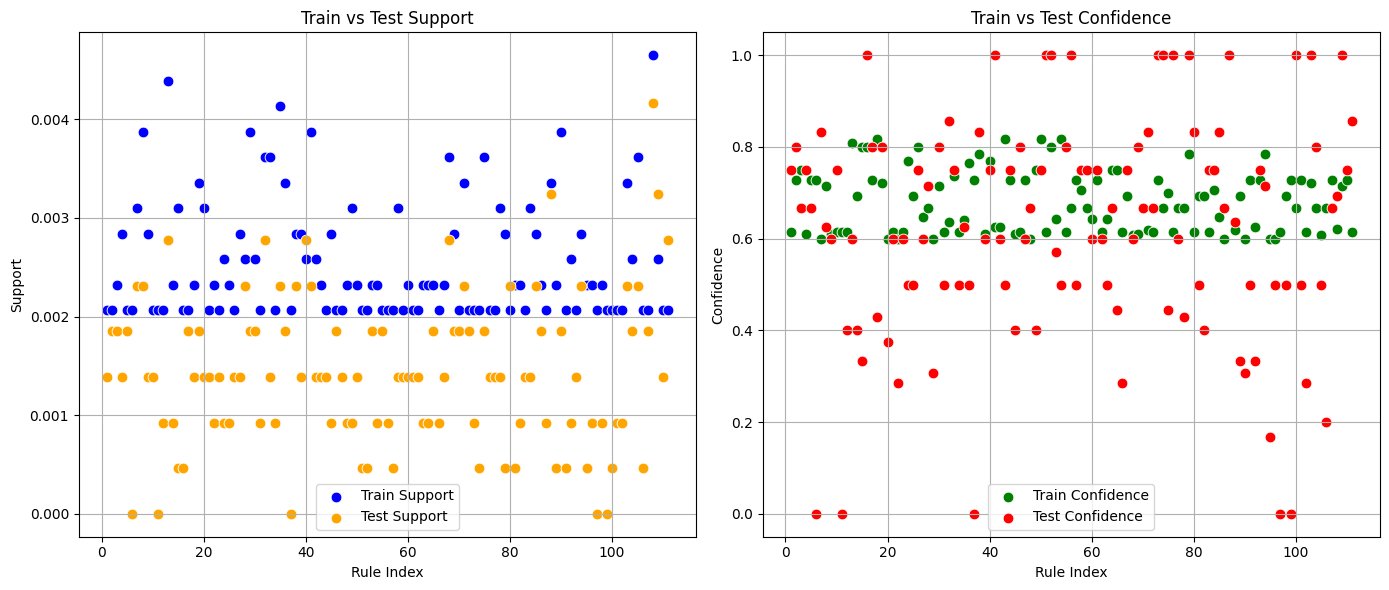

In [116]:
plt.figure(figsize=(14, 6))

# Scatter plot for Support
plt.subplot(1, 2, 1)
sns.scatterplot(x=top_rules.index + 1, y=top_rules['support'], label='Train Support', color='blue', s=60)
sns.scatterplot(x=top_rules.index + 1, y=top_rules['support_test'], label='Test Support', color='orange', s=60)
plt.title('Train vs Test Support')
plt.xlabel('Rule Index')
plt.ylabel('Support')
plt.legend()
plt.grid(True)

# Scatter plot for Confidence
plt.subplot(1, 2, 2)
sns.scatterplot(x=top_rules.index + 1, y=top_rules['confidence'], label='Train Confidence', color='green', s=60)
sns.scatterplot(x=top_rules.index + 1, y=top_rules['confidence_test'], label='Test Confidence', color='red', s=60)
plt.title('Train vs Test Confidence')
plt.xlabel('Rule Index')
plt.ylabel('Confidence')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 5.2 TASK2 : Collaborative Filtering

### 5.2.1 Getting the Associaction Rules

In [117]:
rules_df = top_rules

def clean_and_parse_frozenset(text):

    match = re.search(r"frozenset\((\{.*\})\)", text)
    if match:
        try:
            return ast.literal_eval(match.group(1))
        except:
            return set()
    else:
        return set()


rules_df['antecedents'] = rules_df['antecedents'].astype(str).apply(clean_and_parse_frozenset)
rules_df['consequents'] = rules_df['consequents'].astype(str).apply(clean_and_parse_frozenset)


In [118]:
print("\nLast 5 Association Rules as Recommendation Patterns:\n")
for x, row in rules_df.head(5).iterrows():
    antecedents = ', '.join(sorted(row['antecedents']))
    consequents = ', '.join(sorted(row['consequents']))
    print(f"If [{antecedents}] → Recommend [{consequents}]")



Last 5 Association Rules as Recommendation Patterns:

If [candy, pork] → Recommend [whole milk, yogurt]
If [frozen vegetables, oil] → Recommend [soda]
If [butter milk, curd] → Recommend [whole milk]
If [cat food, pork] → Recommend [other vegetables]
If [frozen vegetables, mustard] → Recommend [whole milk]


### 5.2.2 Collaborative Filtering using Jaccard Method (Recommendation without patterns)
Has excecution time

In [126]:
R = basket.values.astype(float)
binb = (R > 0).astype(int)
y    = binb.flatten()
n    = R.shape[0]

sim = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i == j:
            continue
        inter = np.logical_and(binb[i], binb[j]).sum()
        union = np.logical_or(binb[i], binb[j]).sum()
        sim[i, j] = inter / union if union else 0

K = 10
sim_k = np.zeros_like(sim)
for u in range(n):
    idx = np.argsort(-sim[u])[:K]
    sim_k[u, idx] = sim[u, idx]

denom = sim_k.sum(axis=1, keepdims=True)
denom[denom == 0] = 1
pred = sim_k.dot(R) / denom

def recommend_for_user(user_id, pred_matrix, basket_df, top_n=10):
    try:
        user_idx = basket_df.index.get_loc(user_id)
    except KeyError:
        print(f"User ID {user_id} not found!")
        return []

    user_pred = pred_matrix[user_idx]
    user_items = basket_df.iloc[user_idx].values
    user_pred[user_items > 0] = -np.inf

    top_item_indices = np.argsort(-user_pred)[:top_n]
    top_items = basket_df.columns[top_item_indices]
    top_scores = user_pred[top_item_indices]
    return list(zip(top_items, top_scores))



user_id = 1001
start_time = time.time()
recommendations = recommend_for_user(user_id, pred, basket, top_n=10)
end_time = time.time()

# Print Recommendations
print(f"Top recommendations for user {user_id}:")
for item, score in recommendations:
    print(f"{item}: {score:.3f}")

# End timing

execution_time = end_time - start_time
print(f"\nExecution Time: {execution_time:.2f} seconds")


# Estimate time for 1 million users (n^2 scaling)
scaling_factor = (1_000_000 / basket.shape[0]) ** 2
estimated_time_1M = execution_time * scaling_factor

print("Exceution_time for one ",execution_time)
print("Exceution_time for 1 Million ",estimated_time_1M)


Top recommendations for user 1001:
bottled water: 0.311
canned beer: 0.310
candles: 0.217
brown bread: 0.211
tropical fruit: 0.211
cake bar: 0.208
other vegetables: 0.203
shopping bags: 0.201
newspapers: 0.200
yogurt: 0.192

Execution Time: 227.94 seconds
Exceution_time for one  227.93838930130005
Exceution_time for 1 Million  15203612.000686485


### 5.2.3 CF+ Association Rules (Recommendation with patterns)

In [127]:
def hybrid_recommend(user_id, cf_preds, basket_df, rules_df, top_n=10):
    try:
        user_idx = basket_df.index.get_loc(user_id)
    except KeyError:
        print(f"User ID {user_id} not found!")
        return []

    cf_scores = cf_preds[user_idx]
    top_cf_indices = np.argsort(-cf_scores)
    cf_items = basket_df.columns[top_cf_indices]

    cf_recs = []
    for item in cf_items:
        if basket_df.loc[user_id, item] == 0:
            cf_recs.append(item)
        if len(cf_recs) >= top_n:
            break

    user_items = set(basket_df.columns[basket_df.loc[user_id] > 0])
    ar_candidates = set()

    for _, row in rules_df.iterrows():
        A = row['antecedents']
        B = row['consequents']
        if isinstance(A, set) and A.issubset(user_items):
            ar_candidates.update(B)

    ar_recs = [item for item in ar_candidates if item not in user_items]
    final_recs = []
    seen = set()

    for item in cf_recs:
        if item not in seen:
            final_recs.append(item)
            seen.add(item)
        if len(final_recs) >= top_n:
            return final_recs

    for item in ar_recs:
        if item not in seen:
            final_recs.append(item)
            seen.add(item)
        if len(final_recs) >= top_n:
            break

    return final_recs

user_id = 1001

start_time = time.time()
recs = hybrid_recommend(user_id, pred, basket, rules_df, top_n=10)
end_time = time.time()

execution_time = end_time - start_time

print(f"\nExecution time for 1 user: {execution_time:.6f} seconds")
print(f"Hybrid Recommendations for user {user_id}:")
for item in recs:
    print(f"  {item}")

# Estimate time for 1 million users (n^2 scaling)
scaling_factor = (1_000_000 / basket.shape[0]) ** 2
estimated_time_1M = execution_time * scaling_factor

print("Exceution_time for one ",execution_time)
print("Exceution_time for 1 Million ",estimated_time_1M)



Execution time for 1 user: 0.094016 seconds
Hybrid Recommendations for user 1001:
  bottled water
  canned beer
  candles
  brown bread
  tropical fruit
  cake bar
  other vegetables
  shopping bags
  newspapers
  yogurt
Exceution_time for one  0.09401583671569824
Exceution_time for 1 Million  6270.906395920639


### 5.2.4 Using 5 Sample Rules to give Recommendation, 2 for each rule

In [128]:
user_examples = {}

for i, rule in five_sample_rules.iterrows():
    antecedent = rule['antecedents']
    matching_users = []

    for user_id in basket.index:
        user_items = set(basket.loc[user_id][basket.loc[user_id] > 0].index)
        if antecedent.issubset(user_items):
            matching_users.append(user_id)
        if len(matching_users) >= 2:
            break

    user_examples[i] = matching_users


In [129]:
user_examples

{0: [1146, 2022],
 1: [1240, 1612],
 2: [1634, 1777],
 3: [1810, 1969],
 4: [1013, 1703]}

In [130]:
print("Hybrid Recommendations Based on Association Rule Matches:\n")

for rule_idx, user_ids in user_examples.items():
    print(f"Rule {rule_idx} — Antecedent: {five_sample_rules['antecedents'][rule_idx]}")

    for user_id in user_ids:
        recs = hybrid_recommend(user_id, pred, basket, five_sample_rules, top_n=5)
        print(f"  User {user_id}: {recs}")
    print()


Hybrid Recommendations Based on Association Rule Matches:

Rule 0 — Antecedent: frozenset({'pork', 'candy'})
  User 1146: ['citrus fruit', 'brown bread', 'napkins', 'beef', 'chicken']
  User 2022: ['root vegetables', 'bottled water', 'oil', 'domestic eggs', 'citrus fruit']

Rule 1 — Antecedent: frozenset({'oil', 'frozen vegetables'})
  User 1240: ['other vegetables', 'yogurt', 'bottled beer', 'butter', 'brown bread']
  User 1612: ['napkins', 'sausage', 'hamburger meat', 'other vegetables', 'tropical fruit']

Rule 2 — Antecedent: frozenset({'butter milk', 'curd'})
  User 1634: ['tropical fruit', 'rolls/buns', 'shopping bags', 'brown bread', 'sausage']
  User 1777: ['rolls/buns', 'other vegetables', 'processed cheese', 'condensed milk', 'canned fish']

Rule 3 — Antecedent: frozenset({'pork', 'cat food'})
  User 1810: ['tropical fruit', 'root vegetables', 'whipped/sour cream', 'rolls/buns', 'bottled beer']
  User 1969: ['whole milk', 'napkins', 'other vegetables', 'sausage', 'bottled wate

In [131]:
import pandas as pd
from IPython.display import display

rows = []

# Loop through each rule and corresponding example users
for rule_idx, user_ids in user_examples.items():
    rule_antecedent = five_sample_rules['antecedents'][rule_idx]
    rule_consequent = five_sample_rules['consequents'][rule_idx]

    for user_id in user_ids:
        recs = hybrid_recommend(user_id, pred, basket, five_sample_rules, top_n=5)
        rows.append({
            "Rule Index": rule_idx,
            "Antecedent": ', '.join(rule_antecedent),
            "Consequent": ', '.join(rule_consequent),
            "User ID": user_id,
            "Recommendations": ', '.join(recs)})


recommendations_df = pd.DataFrame(rows)
display(recommendations_df)

recommendations_df.to_csv("hybrid_recommendations_from_rules.csv", index=False)
print(" Saved to 'hybrid_recommendations_from_rules.csv'")


,Rule Index,Antecedent,Consequent,User ID,Recommendations
0,0,"pork, candy","whole milk, yogurt",1146,"citrus fruit, brown bread, napkins, beef, chicken"
1,0,"pork, candy","whole milk, yogurt",2022,"root vegetables, bottled water, oil, domestic ..."
2,1,"oil, frozen vegetables",soda,1240,"other vegetables, yogurt, bottled beer, butter..."
3,1,"oil, frozen vegetables",soda,1612,"napkins, sausage, hamburger meat, other vegeta..."
4,2,"butter milk, curd",whole milk,1634,"tropical fruit, rolls/buns, shopping bags, bro..."
5,2,"butter milk, curd",whole milk,1777,"rolls/buns, other vegetables, processed cheese..."
6,3,"pork, cat food",other vegetables,1810,"tropical fruit, root vegetables, whipped/sour ..."
7,3,"pork, cat food",other vegetables,1969,"whole milk, napkins, other vegetables, sausage..."
8,4,"mustard, frozen vegetables",whole milk,1013,"soda, rolls/buns, shopping bags, UHT-milk, bro..."
9,4,"mustard, frozen vegetables",whole milk,1703,"rolls/buns, brown bread, instant coffee, cling..."


 Saved to 'hybrid_recommendations_from_rules.csv'


### 5.2.5 Evaluation (CF (without patterns) vs CF+AR(with patterns))

,Average
Metric,
CF_precision_train,0.5393
CF_recall_train,0.8603
Hybrid_precision_train,0.5393
Hybrid_recall_train,0.8603
CF_precision_test,0.4017
CF_recall_test,0.2105
Hybrid_precision_test,0.3176
Hybrid_recall_test,0.1182


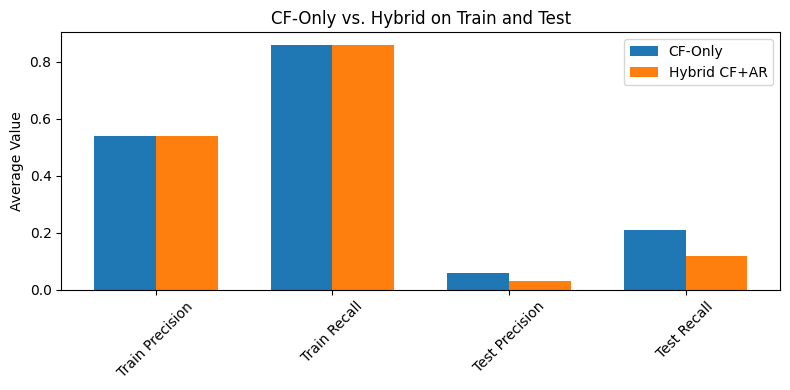

In [135]:
def cf_recommend_no_mask(user_id, cf_preds, basket_df, top_n=5):
    try:
        user_idx = basket_df.index.get_loc(user_id)
    except KeyError:
        return []

    user_scores = cf_preds[user_idx]
    top_idxs = np.argsort(-user_scores)[:top_n]
    return list(basket_df.columns[top_idxs])

def hybrid_recommend_no_mask(user_id, cf_preds, basket_df, rules_df, top_n=10):
    try:
        user_idx = basket_df.index.get_loc(user_id)
    except KeyError:
        return []

    cf_scores = cf_preds[user_idx]
    top_cf_idxs = np.argsort(-cf_scores)[:top_n]
    cf_items = basket_df.columns[top_cf_idxs]
    cf_recs = list(cf_items)

    if len(cf_recs) >= top_n:
        return cf_recs[:top_n]

    user_items = set(basket_df.columns[basket_df.loc[user_id] > 0])
    ar_candidates = set()
    for _, row in rules_df.iterrows():
        A = row['antecedents']
        B = row['consequents']
        if isinstance(A, set) and A.issubset(user_items):
            ar_candidates.update(B)

    ar_recs = [item for item in ar_candidates if item not in user_items]

    final_recs = cf_recs.copy()
    seen = set(final_recs)
    for item in ar_recs:
        if item not in seen:
            final_recs.append(item)
            seen.add(item)
        if len(final_recs) >= top_n:
            break

    return final_recs[:top_n]

# --------------------
# TRAIN EVALUATION
# --------------------

results_train = []

for user_id in basket.index:
    recs_cf_train = cf_recommend_no_mask(user_id, pred, basket, top_n=10)

    actual_items_train = set(basket.loc[user_id][basket.loc[user_id] > 0].index)
    if len(actual_items_train) == 0:
        continue

    tp_cf_train = sum(1 for item in recs_cf_train if item in actual_items_train)
    precision_cf_train = tp_cf_train / 10
    recall_cf_train = tp_cf_train / len(actual_items_train)

    recs_hybrid_train = hybrid_recommend_no_mask(user_id, pred, basket, rules_df, top_n=10)

    tp_hybrid_train = sum(1 for item in recs_hybrid_train if item in actual_items_train)
    precision_hybrid_train = tp_hybrid_train / 10
    recall_hybrid_train = tp_hybrid_train / len(actual_items_train)

    results_train.append({
        'user_id': user_id,
        'CF_precision_train': precision_cf_train,
        'CF_recall_train': recall_cf_train,
        'Hybrid_precision_train': precision_hybrid_train,
        'Hybrid_recall_train': recall_hybrid_train
    })

results_train_df = pd.DataFrame(results_train).set_index('user_id')

# --------------------
# TEST EVALUATION
# --------------------

results_test = []

for user_id in test_basket.index:
    # Only evaluate users known in training basket
    if user_id not in basket.index:
        continue

    try:
        user_idx = basket.index.get_loc(user_id)  # Use train basket index for prediction
    except KeyError:
        continue

    cf_scores_test = pred[user_idx].copy()

    train_items = set(basket.loc[user_id][basket.loc[user_id] > 0].index)
    for item in train_items:
        col_idx = basket.columns.get_loc(item)
        cf_scores_test[col_idx] = -np.inf  # mask out train items

    top10_cf_test_idxs = np.argsort(-cf_scores_test)[:10]
    recs_cf_test = list(basket.columns[top10_cf_test_idxs])

    recs_hybrid_test = hybrid_recommend_no_mask(user_id, pred, basket, rules_df, top_n=10)

    actual_train_items = set(basket.loc[user_id][basket.loc[user_id] > 0].index)
    actual_test_items = set(test_basket.loc[user_id][test_basket.loc[user_id] > 0].index)
    actual_new_items = actual_test_items - actual_train_items

    if len(actual_new_items) == 0:
        continue

    tp_cf_test = sum(1 for item in recs_cf_test if item in actual_new_items)
    precision_cf_test = tp_cf_test / 10
    recall_cf_test = tp_cf_test / len(actual_new_items)

    tp_hybrid_test = sum(1 for item in recs_hybrid_test if item in actual_new_items)
    precision_hybrid_test = tp_hybrid_test / 10
    recall_hybrid_test = tp_hybrid_test / len(actual_new_items)

    results_test.append({
        'user_id': user_id,
        'CF_precision_test': precision_cf_test,
        'CF_recall_test': recall_cf_test,
        'Hybrid_precision_test': precision_hybrid_test,
        'Hybrid_recall_test': recall_hybrid_test
    })

results_test_df = pd.DataFrame(results_test).set_index('user_id')

# --------------------
# Combine and summarize
# --------------------

combined_df = results_train_df.join(
    results_test_df,
    how='inner',
    lsuffix='_train',
    rsuffix='_test'
)

avg_cf_prec_train = combined_df['CF_precision_train'].mean()
avg_cf_rec_train = combined_df['CF_recall_train'].mean()
avg_hybrid_prec_train = combined_df['Hybrid_precision_train'].mean()
avg_hybrid_rec_train = combined_df['Hybrid_recall_train'].mean()

avg_cf_prec_test = combined_df['CF_precision_test'].mean()
avg_cf_rec_test = combined_df['CF_recall_test'].mean()
avg_hybrid_prec_test = combined_df['Hybrid_precision_test'].mean()
avg_hybrid_rec_test = combined_df['Hybrid_recall_test'].mean()

summary_table = pd.DataFrame({
    'Metric': [
        'CF_precision_train', 'CF_recall_train',
        'Hybrid_precision_train', 'Hybrid_recall_train',
        'CF_precision_test', 'CF_recall_test',
        'Hybrid_precision_test', 'Hybrid_recall_test'],
    'Average': [
        avg_cf_prec_train,
        avg_cf_rec_train,
        avg_hybrid_prec_train,
        avg_hybrid_rec_train,
        avg_cf_prec_test,
        avg_cf_rec_test,
        avg_hybrid_prec_test,
        avg_hybrid_rec_test
    ]
}).set_index('Metric')

from IPython.display import display

display(summary_table.round(4))
summary_table.round(4).to_csv("summary_with_vs_without_frequentpatterns.csv")

# --------------------
# Plotting
# --------------------

labels = ['Train Precision', 'Train Recall', 'Test Precision', 'Test Recall']
cf_vals = [avg_cf_prec_train, avg_cf_rec_train, avg_cf_prec_test, avg_cf_rec_test]
hybrid_vals = [avg_hybrid_prec_train, avg_hybrid_rec_train, avg_hybrid_prec_test, avg_hybrid_rec_test]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x - width/2, cf_vals, width, label='CF‐Only')
plt.bar(x + width/2, hybrid_vals, width, label='Hybrid CF+AR')

plt.xticks(x, labels, rotation=45)
plt.ylabel('Average Value')
plt.title('CF-Only vs. Hybrid on Train and Test')
plt.legend()
plt.tight_layout()
plt.show()


In [136]:
user_recommend_dict = {}

for user_id in basket.index:
    recs = hybrid_recommend(user_id, pred, basket, rules_df, top_n=10)
    user_recommend_dict[user_id] = recs

task2 = pd.DataFrame.from_dict(user_recommend_dict, orient='index')
task2.columns = [f'Rec_{i+1}' for i in range(task2.shape[1])]
task2.head()

,Rec_1,Rec_2,Rec_3,Rec_4,Rec_5,Rec_6,Rec_7,Rec_8,Rec_9,Rec_10
1000,rolls/buns,other vegetables,whole milk,frankfurter,sugar,cream cheese,margarine,onions,red/blush wine,meat
1001,bottled water,canned beer,candles,brown bread,tropical fruit,cake bar,other vegetables,shopping bags,newspapers,yogurt
1002,bottled water,root vegetables,soda,shopping bags,rolls/buns,chocolate marshmallow,soft cheese,cling film/bags,chewing gum,curd
1003,brown bread,fruit/vegetable juice,mustard,citrus fruit,canned fish,cream cheese,cream,curd,bottled beer,candles
1004,beef,yogurt,citrus fruit,margarine,frankfurter,bottled beer,sausage,pet care,domestic eggs,packaged fruit/vegetables


## 5.3 TASK3 : Research Integration (Just a Jist on boosting method)

### 5.3.1 Implementaion

In [142]:
def boosting(userId, topK=10, beta=0.5):
    # CF top-10 recommendations for userId
    cfCols = [f'Rec_{i}' for i in range(1, 11)]
    cfList = task2.loc[userId, cfCols].tolist()

    # User's true purchase history in train basket
    history = {item for item, qty in basket.loc[userId].items() if qty > 0}

    # Union of all consequents for rules where antecedents subset of history
    conseq_union = {
        itm
        for _, rule in rules_df.iterrows()
        if rule['antecedents'].issubset(history)
        for itm in rule['consequents']}

    # Rank score for CF items
    rank_score = {itm: idx for idx, itm in enumerate(cfList)}

    # Boost CF scores by subtracting beta if in consequents
    boosted = sorted(cfList, key=lambda itm: rank_score.get(itm, 1000) - (beta if itm in conseq_union else 0))

    return boosted[:topK]


In [143]:
user_id = 1456
recommended_items = boosting(user_id, topK=10, beta=0.5)
print(f"Boosted recommendations for user {user_id}:\n", recommended_items)


Boosted recommendations for user 1456:
 ['soda', 'waffles', 'specialty bar', 'tropical fruit', 'yogurt', 'fruit/vegetable juice', 'onions', 'root vegetables', 'semi-finished bread', 'brandy']
